In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [2]:
caba = gpd.read_file(
    r"C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\geo\CABA.shp")

In [3]:
caba.head()


,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


In [4]:
pp2 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp2.csv', 
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp2

,pp2
NaN,sum
circuito,NaN
1,2113
2,2122
3,812
...,...
163,2276
164,1900
165,3588
166,2569


ACOMODAMOS LOS FRAMES 

In [5]:
pp2 = pp2.reset_index()

In [6]:
pp2

,index,pp2
0,NaN,sum
1,circuito,NaN
2,1,2113
3,2,2122
4,3,812
...,...,...
164,163,2276
165,164,1900
166,165,3588
167,166,2569


In [7]:
pp2 = pp2.rename(columns={'index':'circuito'})

In [8]:
pp2

,circuito,pp2
0,NaN,sum
1,circuito,NaN
2,1,2113
3,2,2122
4,3,812
...,...,...
164,163,2276
165,164,1900
166,165,3588
167,166,2569


In [9]:
pp2 = pp2.drop([0, 1],axis=0)

In [10]:
pp2 = pp2.astype({"circuito":int})
pp2.dtypes

circuito     int32
pp2         object
dtype: object

In [11]:
caba = caba.astype({"circuito":int})
caba.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
dtype: object

### HERMES WINNER

MERGE CANDIDATO CON EL ESPACIO

In [12]:
mapa_pp2 = pd.merge(caba, pp2, on="circuito", how="inner")
mapa_pp2

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,pp2
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",812
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",3134
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",2572
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",2084
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",1725
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",1460
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",3007
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",3835
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",1536


In [14]:
mapa_pp2 = mapa_pp2.astype({"pp2":int})
mapa_pp2.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp2              int32
dtype: object

### Hermes Winner por circuito

<AxesSubplot:>

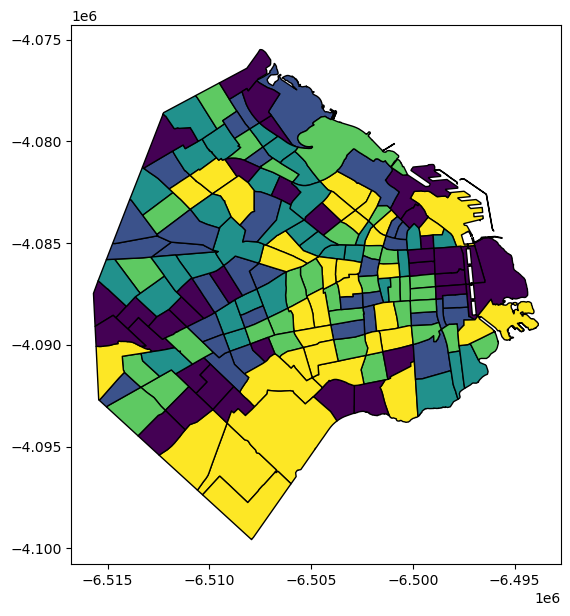

In [74]:
mapa_pp2.plot(column='pp2', scheme='quantiles', edgecolor='k', figsize=(7, 7))

### PARTIDO 1

In [16]:
pp1 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp1', 
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp1

,pp1
NaN,sum
circuito,NaN
1,1955
2,2005
3,600
...,...
163,2290
164,2095
165,3618
166,2970


In [17]:
pp1 = pp1.reset_index()
pp1

,index,pp1
0,NaN,sum
1,circuito,NaN
2,1,1955
3,2,2005
4,3,600
...,...,...
164,163,2290
165,164,2095
166,165,3618
167,166,2970


In [18]:
pp1 = pp1.rename(columns={'index':'circuito'})
pp1

,circuito,pp1
0,NaN,sum
1,circuito,NaN
2,1,1955
3,2,2005
4,3,600
...,...,...
164,163,2290
165,164,2095
166,165,3618
167,166,2970


In [19]:
pp1 = pp1.drop([0, 1],axis=0)
pp1

,circuito,pp1
2,1,1955
3,2,2005
4,3,600
5,4,336
6,5,4053
...,...,...
164,163,2290
165,164,2095
166,165,3618
167,166,2970


In [20]:
pp1 = pp1.astype({"circuito":int})
pp1.dtypes

circuito     int32
pp1         object
dtype: object

In [21]:
mapa_pp1 = pd.merge(caba, pp1, on="circuito", how="inner")
mapa_pp1

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,pp1
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",600
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",1292
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",2339
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",1880
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",1796
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",1620
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",3079
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",3342
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",2219


In [25]:
mapa_pp1 = mapa_pp1.astype({"pp1":int})
mapa_pp1.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp1              int32
dtype: object

### MAPA PARTIDO 1 

<AxesSubplot:>

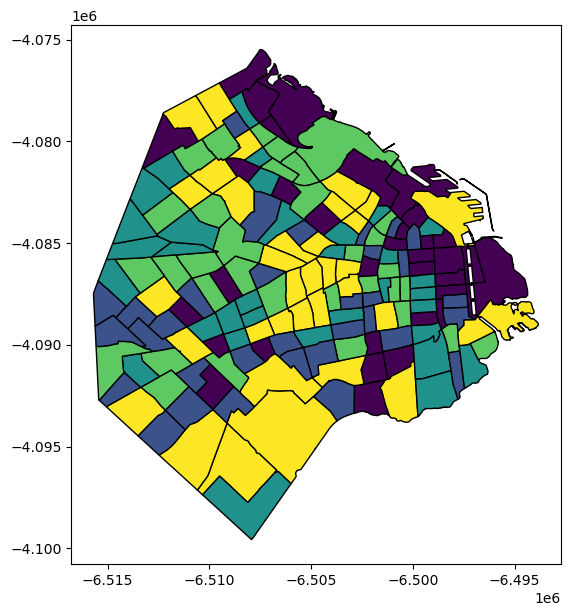

In [75]:
mapa_pp1.plot(column='pp1', scheme='quantiles', edgecolor='k', figsize=(7, 7))

### PARTIDO 3

In [32]:
pp3 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp3', 
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp3

,pp3
NaN,sum
circuito,NaN
1,1237
2,1220
3,286
...,...
163,2040
164,2039
165,3157
166,2773


In [33]:
pp3 = pp3.reset_index()
pp3

,index,pp3
0,NaN,sum
1,circuito,NaN
2,1,1237
3,2,1220
4,3,286
...,...,...
164,163,2040
165,164,2039
166,165,3157
167,166,2773


In [34]:
pp3 = pp3.rename(columns={'index':'circuito'})
pp3

,circuito,pp3
0,NaN,sum
1,circuito,NaN
2,1,1237
3,2,1220
4,3,286
...,...,...
164,163,2040
165,164,2039
166,165,3157
167,166,2773


In [35]:
pp3 = pp3.drop([0, 1],axis=0)
pp3

,circuito,pp3
2,1,1237
3,2,1220
4,3,286
5,4,140
6,5,3029
...,...,...
164,163,2040
165,164,2039
166,165,3157
167,166,2773


In [36]:
pp3 = pp3.astype({"circuito":int})
pp3.dtypes

circuito     int32
pp3         object
dtype: object

In [37]:
mapa_pp3 = pd.merge(caba, pp3, on="circuito", how="inner")
mapa_pp3

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,pp3
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",286
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",234
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",1423
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",894
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",2654
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",2058
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",5807
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",2414
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",2533


In [38]:
mapa_pp3 = mapa_pp3.astype({"pp3":int})
mapa_pp3.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp3              int32
dtype: object

### PARTIDO 3 POR CIRCUITO

<AxesSubplot:>

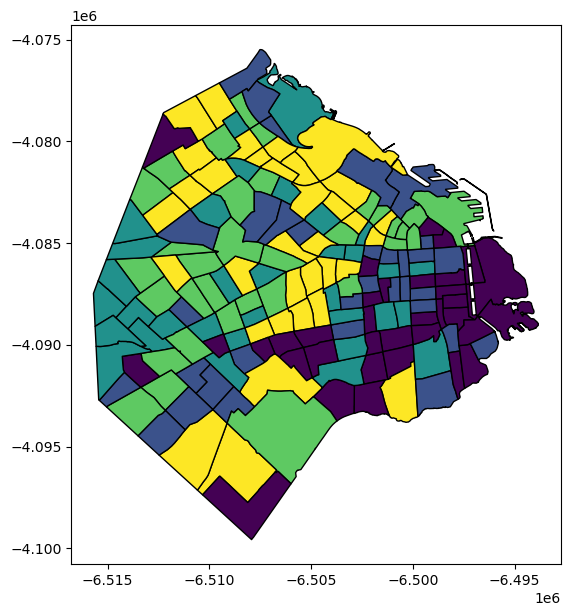

In [76]:
mapa_pp3.plot(column='pp3', scheme='quantiles', edgecolor='k', figsize=(7, 7))

### PARTIDO 4

In [42]:
pp4 = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\pp4', 
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
pp4

,pp4
NaN,sum
circuito,NaN
1,1182
2,1390
3,383
...,...
163,2174
164,2106
165,3399
166,2878


In [43]:
pp4 = pp4.reset_index()
pp4

,index,pp4
0,NaN,sum
1,circuito,NaN
2,1,1182
3,2,1390
4,3,383
...,...,...
164,163,2174
165,164,2106
166,165,3399
167,166,2878


In [44]:
pp4 = pp4.rename(columns={'index':'circuito'})
pp4

,circuito,pp4
0,NaN,sum
1,circuito,NaN
2,1,1182
3,2,1390
4,3,383
...,...,...
164,163,2174
165,164,2106
166,165,3399
167,166,2878


In [45]:
pp4 = pp4.drop([0, 1],axis=0)
pp4

,circuito,pp4
2,1,1182
3,2,1390
4,3,383
5,4,196
6,5,2929
...,...,...
164,163,2174
165,164,2106
166,165,3399
167,166,2878


In [46]:
pp4 = pp4.astype({"circuito":int})
pp4.dtypes

circuito     int32
pp4         object
dtype: object

In [47]:
mapa_pp4 = pd.merge(caba, pp4, on="circuito", how="inner")
mapa_pp4

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,pp4
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",383
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",345
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",1486
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",860
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",2706
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",2272
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",5404
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",2591
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",2349


In [49]:
mapa_pp4 = mapa_pp4.astype({"pp4":int})
mapa_pp4.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
pp4              int32
dtype: object

### MAPA PARTIDO 4 POR CIRCUITO

<AxesSubplot:>

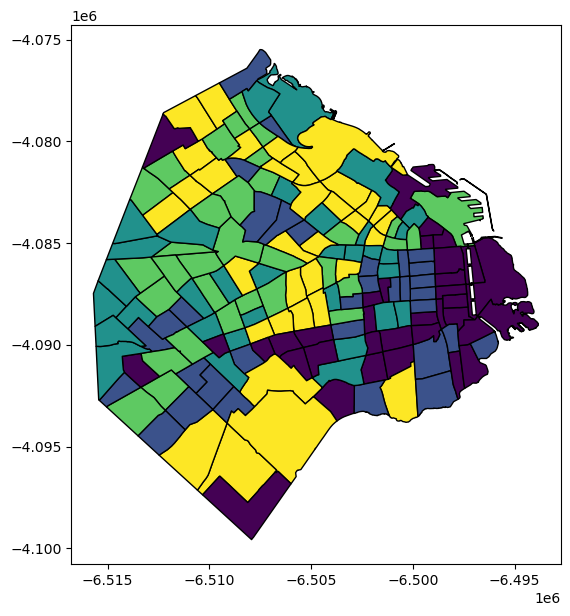

In [77]:
mapa_pp4.plot(column='pp4', scheme='quantiles', edgecolor='k', figsize=(7, 7))

### NO VOTO

In [53]:
no_voto = pd.read_csv(
    r'C:\Users\leand_5odr3v\Desktop\rocio python\Data met4op\simulacion\elecciones\nv', 
    delimiter=',',
    header=0,
    names=None,
    index_col=0,
    usecols=None,
    dtype=None,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    decimal='.',
    quotechar='"',
)
no_voto = no_voto.reset_index()
no_voto

,index,nv
0,NaN,sum
1,circuito,NaN
2,1,1655
3,2,1618
4,3,509
...,...,...
164,163,2174
165,164,2119
166,165,3501
167,166,2798


In [54]:
no_voto = no_voto.rename(columns={'index':'circuito'})

In [55]:
no_voto

,circuito,nv
0,NaN,sum
1,circuito,NaN
2,1,1655
3,2,1618
4,3,509
...,...,...
164,163,2174
165,164,2119
166,165,3501
167,166,2798


In [57]:
no_voto = no_voto.drop([0, 1],axis=0)

In [64]:
no_voto = no_voto.astype({"circuito":int})

In [65]:
mapa_nv= pd.merge(caba, no_voto, on="circuito", how="inner")
mapa_nv

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,nv
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",509
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -...",1253
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -...",2028
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -...",1457
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -...",2307
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -...",1858
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -...",4343
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -...",3127
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -...",2305


In [66]:
mapa_nv = mapa_nv.astype({"nv":int})
mapa_nv.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito         int32
indec_p         object
indec_d         object
geometry      geometry
nv               int32
dtype: object

### MAPA NO VOTANTES

<AxesSubplot:>

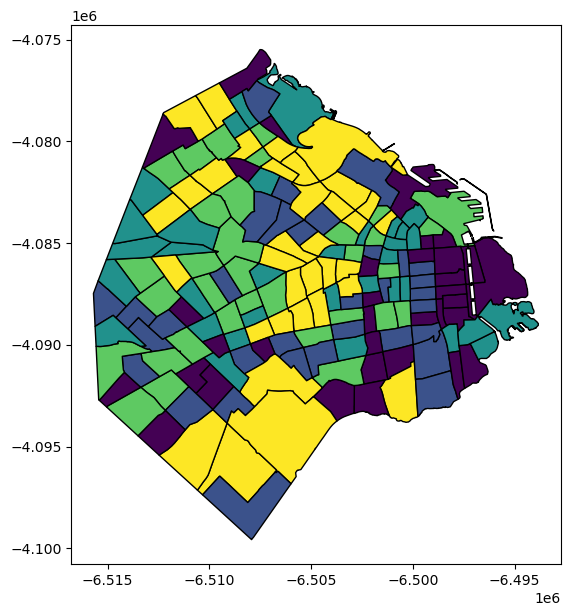

In [78]:
mapa_nv.plot(column='nv', scheme='quantiles', edgecolor='k', figsize=(7, 7))